#1. Importing  Dataset

In [ ]:
import pandas as pd

# Read the dataset into a pandas DataFrame
data = pd.read_csv('Air Quality.csv')

# Remove unnamed columns
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]

# Remove unnamed rows
data = data.dropna(subset=['Date', 'Time'])

# Reset the index after removing rows
data = data.reset_index(drop=True)



In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
data.shape

(9357, 15)

In [ ]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


#2. Pre-processing

In [ ]:
print(data.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
# Convert integer columns to float
int_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
               'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T']
data[int_columns] = data[int_columns].astype(float)


In [ ]:
# Convert date and time columns to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Extract desired components as integer columns

data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['Hour'] = pd.to_datetime(data['Time'].astype(str)).dt.hour
data['Minute'] = pd.to_datetime(data['Time'].astype(str)).dt.minute
data['Second'] = pd.to_datetime(data['Time'].astype(str)).dt.second
data

<ipython-input-8-626853c66cc8>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,PT08.S5(O3),T,RH,AH,Month,Day,Year,Hour,Minute,Second
0,2004-10-03,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,...,1268.0,13.6,48.9,0.7578,10,3,2004,18,0,0
1,2004-10-03,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,...,972.0,13.3,47.7,0.7255,10,3,2004,19,0,0
2,2004-10-03,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,...,1074.0,11.9,54.0,0.7502,10,3,2004,20,0,0
3,2004-10-03,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,...,1203.0,11.0,60.0,0.7867,10,3,2004,21,0,0
4,2004-10-03,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,...,1110.0,11.2,59.6,0.7888,10,3,2004,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,...,1729.0,21.9,29.3,0.7568,4,4,2005,10,0,0
9353,2005-04-04,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,...,1269.0,24.3,23.7,0.7119,4,4,2005,11,0,0
9354,2005-04-04,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,...,1092.0,26.9,18.3,0.6406,4,4,2005,12,0,0
9355,2005-04-04,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,...,770.0,28.3,13.5,0.5139,4,4,2005,13,0,0


In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,PT08.S5(O3),T,RH,AH,Month,Day,Year,Hour,Minute,Second
0,2004-10-03,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,...,1268.0,13.6,48.9,0.7578,10,3,2004,18,0,0
1,2004-10-03,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,...,972.0,13.3,47.7,0.7255,10,3,2004,19,0,0
2,2004-10-03,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,...,1074.0,11.9,54.0,0.7502,10,3,2004,20,0,0
3,2004-10-03,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,...,1203.0,11.0,60.0,0.7867,10,3,2004,21,0,0
4,2004-10-03,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,...,1110.0,11.2,59.6,0.7888,10,3,2004,22,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Month          9357 n

#3. Exploratory Data Analysis

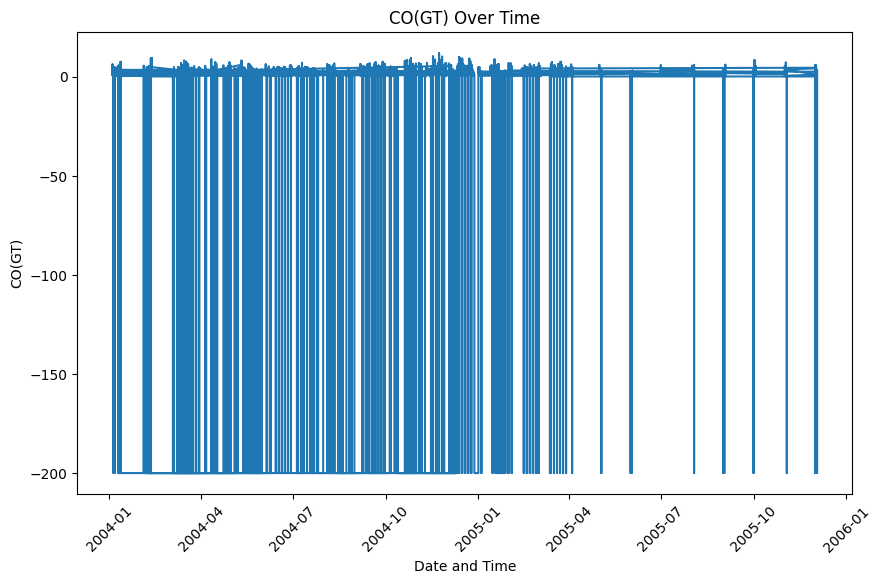

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Line plot of CO(GT) over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['CO(GT)'])
plt.xlabel('Date and Time')
plt.ylabel('CO(GT)')
plt.title('CO(GT) Over Time')
plt.xticks(rotation=45)
plt.show()


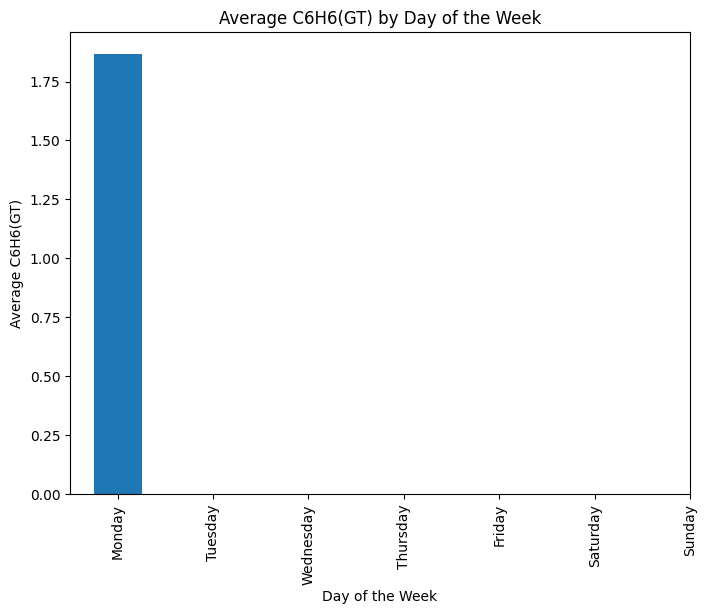

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Day' column to datetime-like format
data['Day'] = pd.to_datetime(data['Day'])

# Visualization 2: Bar plot of average C6H6(GT) by day of the week
plt.figure(figsize=(8, 6))
data.groupby(data['Day'].dt.dayofweek)['C6H6(GT)'].mean().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average C6H6(GT)')
plt.title('Average C6H6(GT) by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


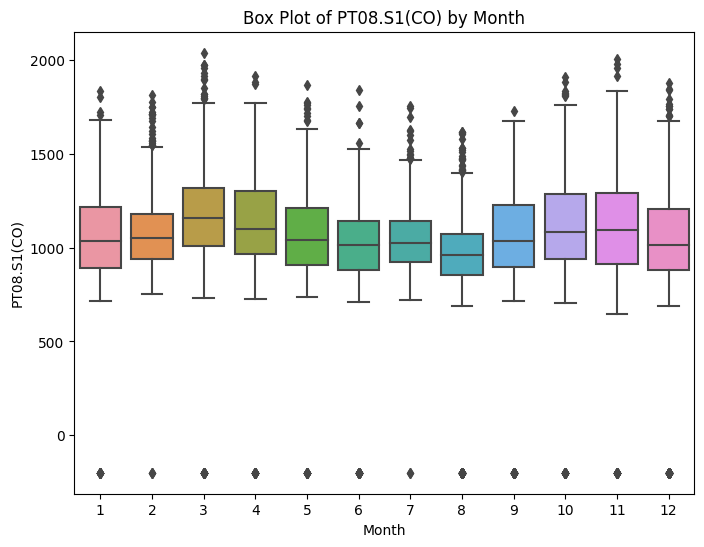

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 3: Box plot of PT08.S1(CO) by month
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Month'], y=data['PT08.S1(CO)'])
plt.xlabel('Month')
plt.ylabel('PT08.S1(CO)')
plt.title('Box Plot of PT08.S1(CO) by Month')
plt.show()


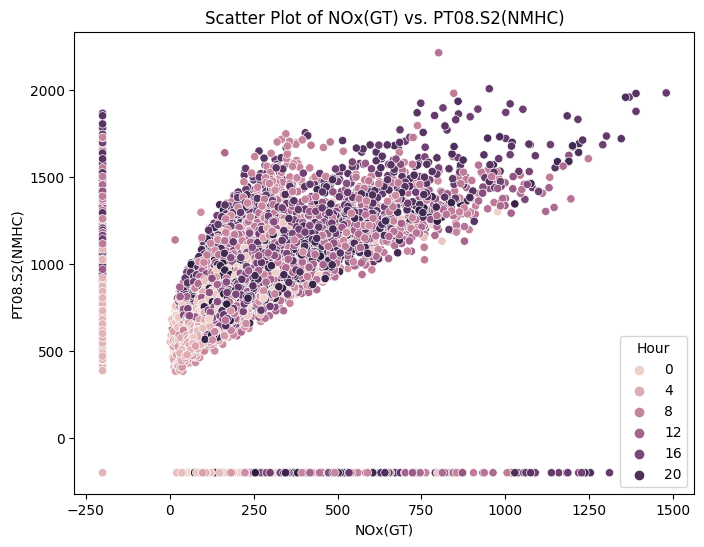

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 4: Scatter plot of NOx(GT) vs. PT08.S2(NMHC) colored by hour
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['NOx(GT)'], y=data['PT08.S2(NMHC)'], hue=data['Hour'])
plt.xlabel('NOx(GT)')
plt.ylabel('PT08.S2(NMHC)')
plt.title('Scatter Plot of NOx(GT) vs. PT08.S2(NMHC)')
plt.show()


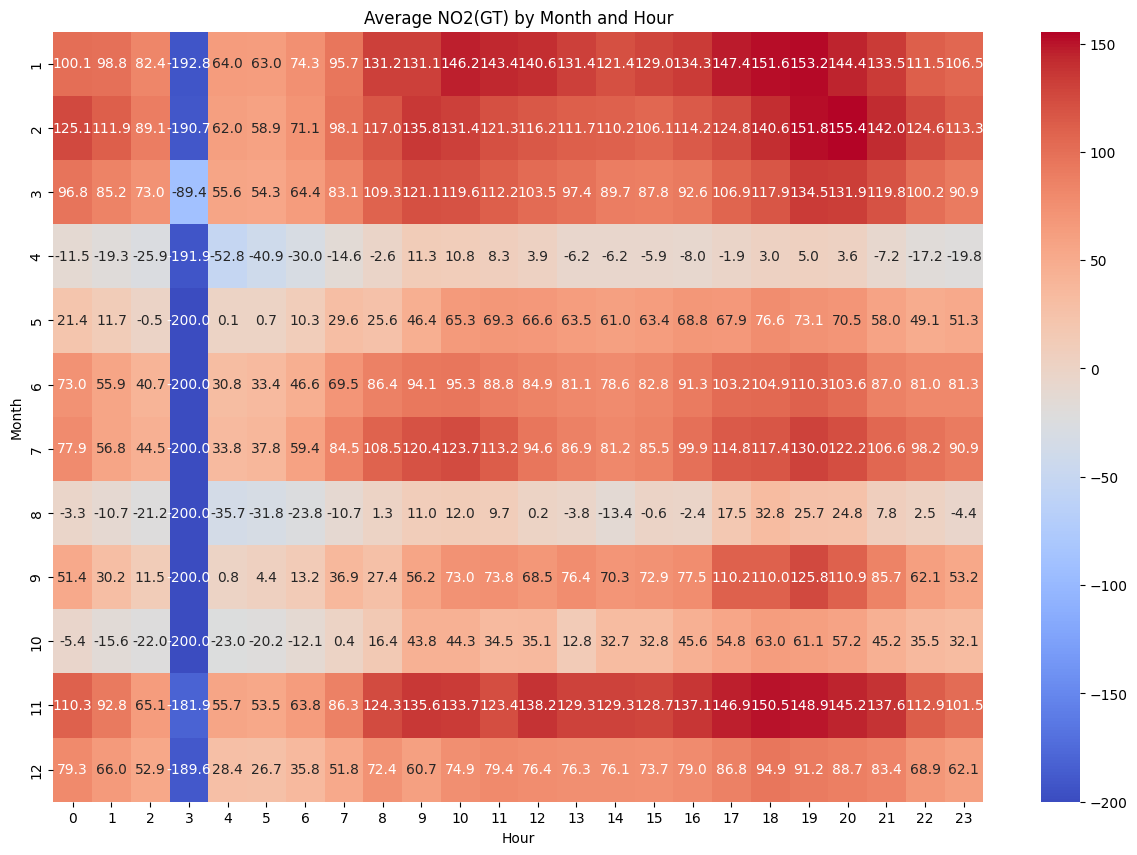

In [ ]:
# Visualization 5: Heatmap of average NO2(GT) by month and hour
pivot_table = data.pivot_table(index='Month', columns='Hour', values='NO2(GT)', aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.title('Average NO2(GT) by Month and Hour')
plt.show()

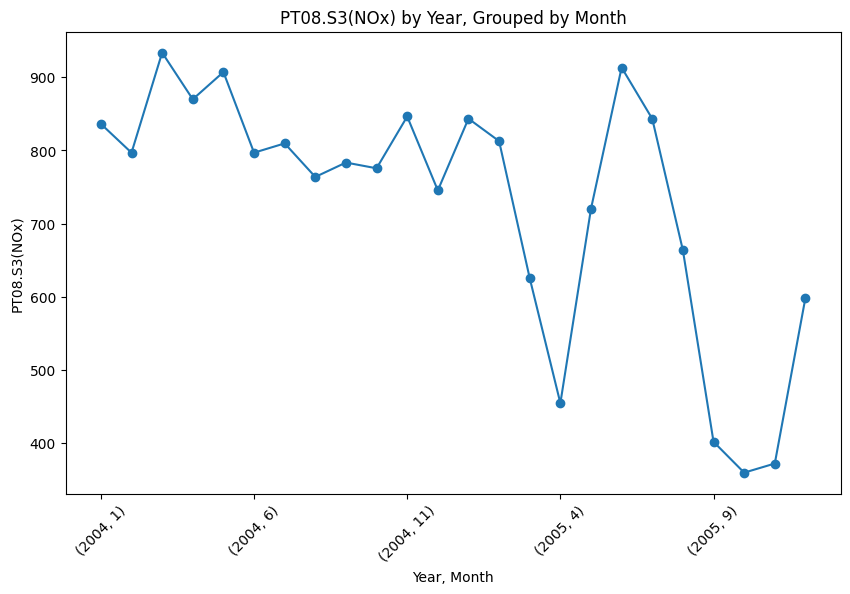

In [ ]:
# Visualization 6: Line plot of PT08.S3(NOx) by year, grouped by month
plt.figure(figsize=(10, 6))
data.groupby([data['Year'], data['Month']])['PT08.S3(NOx)'].mean().plot(marker='o')
plt.xlabel('Year, Month')
plt.ylabel('PT08.S3(NOx)')
plt.title('PT08.S3(NOx) by Year, Grouped by Month')
plt.xticks(rotation=45)
plt.show()

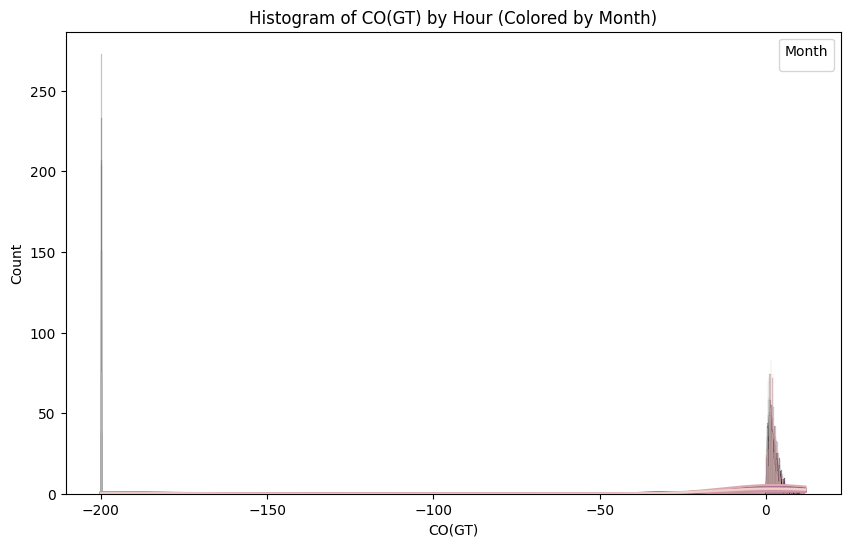

In [ ]:
# Visualization 7: Histogram of CO(GT) by hour, colored by month
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CO(GT)', hue='Month', kde=True)
plt.xlabel('CO(GT)')
plt.ylabel('Count')
plt.title('Histogram of CO(GT) by Hour (Colored by Month)')
plt.legend(title='Month')
plt.show()

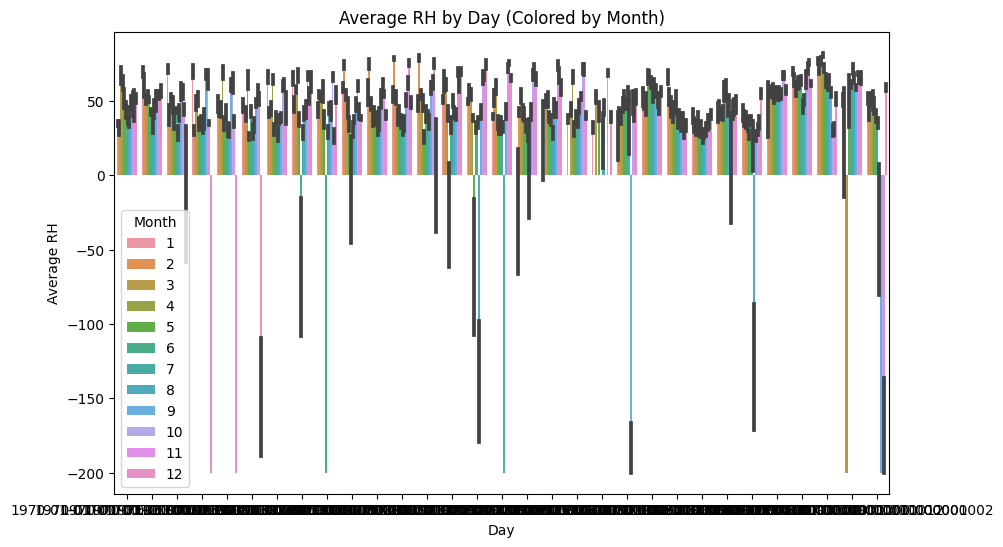

In [ ]:
# Visualization 8: Bar plot of average RH by day, colored by month
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x=data['Day'], y=data['RH'], hue=data['Month'])
plt.xlabel('Day')
plt.ylabel('Average RH')
plt.title('Average RH by Day (Colored by Month)')
plt.show()

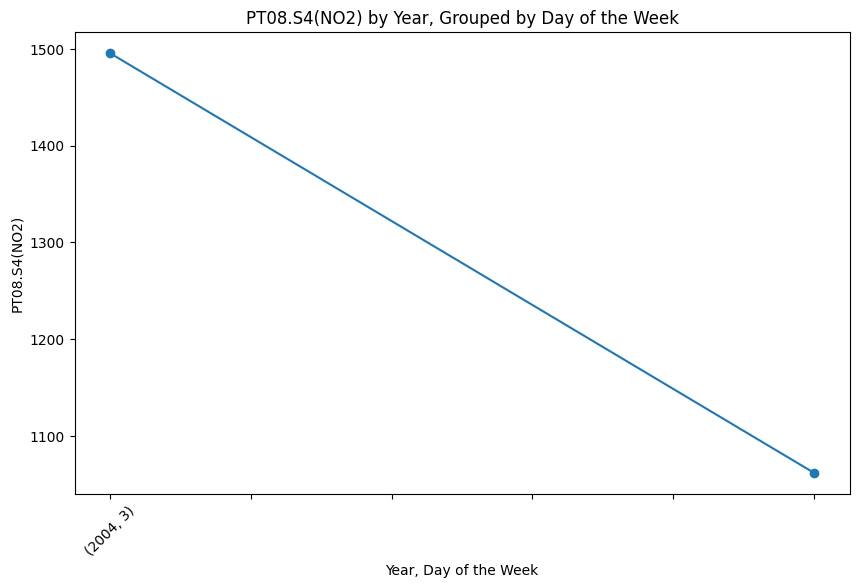

In [ ]:
# Visualization 9: Line plot of PT08.S4(NO2) by year, grouped by day of the week
plt.figure(figsize=(10, 6))
data.groupby([data['Year'], data['Day'].dt.dayofweek])['PT08.S4(NO2)'].mean().plot(marker='o')
plt.xlabel('Year, Day of the Week')
plt.ylabel('PT08.S4(NO2)')
plt.title('PT08.S4(NO2) by Year, Grouped by Day of the Week')
plt.xticks(rotation=45)
plt.show()

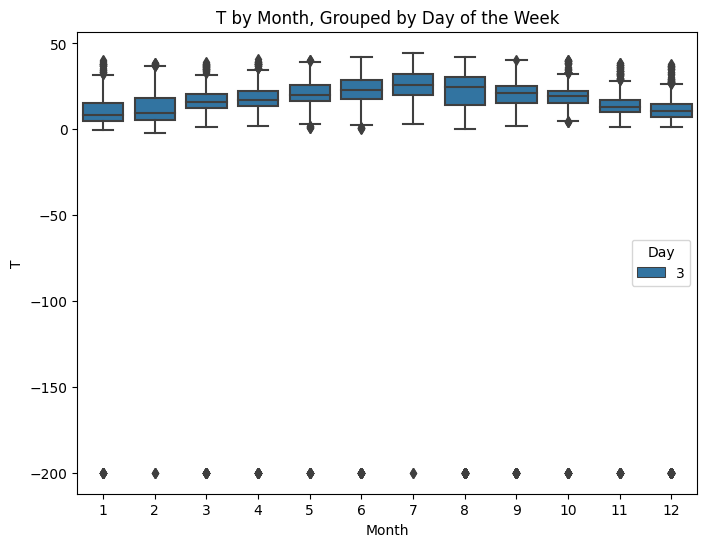

In [ ]:
# Visualization 10: Box plot of T by month, grouped by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=data['Month'], y=data['T'], hue=data['Day'].dt.dayofweek)
plt.xlabel('Month')
plt.ylabel('T')
plt.title('T by Month, Grouped by Day of the Week')
plt.show()

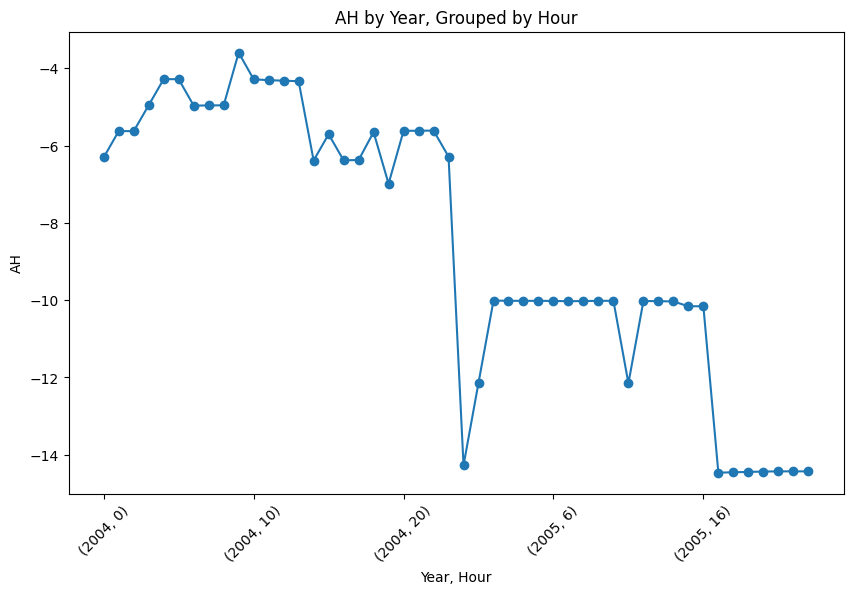

In [ ]:
# Visualization 11: Line plot of AH by year, grouped by hour
plt.figure(figsize=(10, 6))
data.groupby([data['Year'], data['Hour']])['AH'].mean().plot(marker='o')
plt.xlabel('Year, Hour')
plt.ylabel('AH')
plt.title('AH by Year, Grouped by Hour')
plt.xticks(rotation=45)
plt.show()

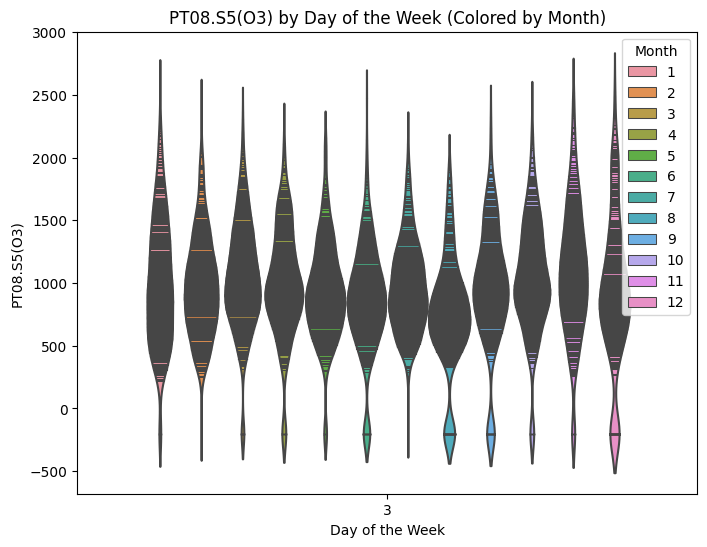

In [ ]:
# Visualization 12: Violin plot of PT08.S5(O3) by day of the week, colored by month
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x=data['Day'].dt.dayofweek, y=data['PT08.S5(O3)'], hue=data['Month'], inner='stick')
plt.xlabel('Day of the Week')
plt.ylabel('PT08.S5(O3)')
plt.title('PT08.S5(O3) by Day of the Week (Colored by Month)')
plt.show()

<Figure size 1000x600 with 0 Axes>

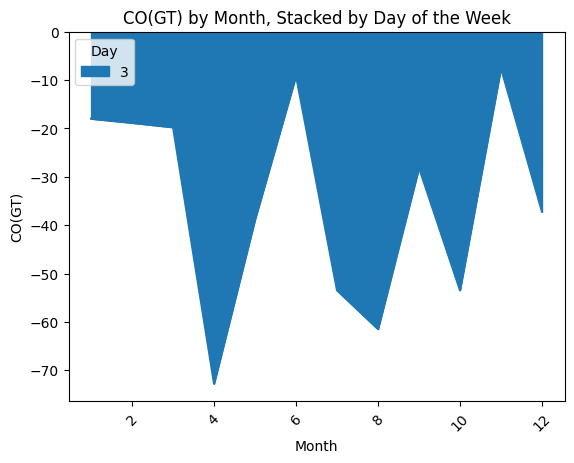

In [ ]:
# Visualization 13: Area plot of CO(GT) by month, stacked by day of the week
plt.figure(figsize=(10, 6))
data.groupby([data['Month'], data['Day'].dt.dayofweek])['CO(GT)'].mean().unstack().plot.area()
plt.xlabel('Month')
plt.ylabel('CO(GT)')
plt.title('CO(GT) by Month, Stacked by Day of the Week')
plt.xticks(rotation=45)
plt.show()

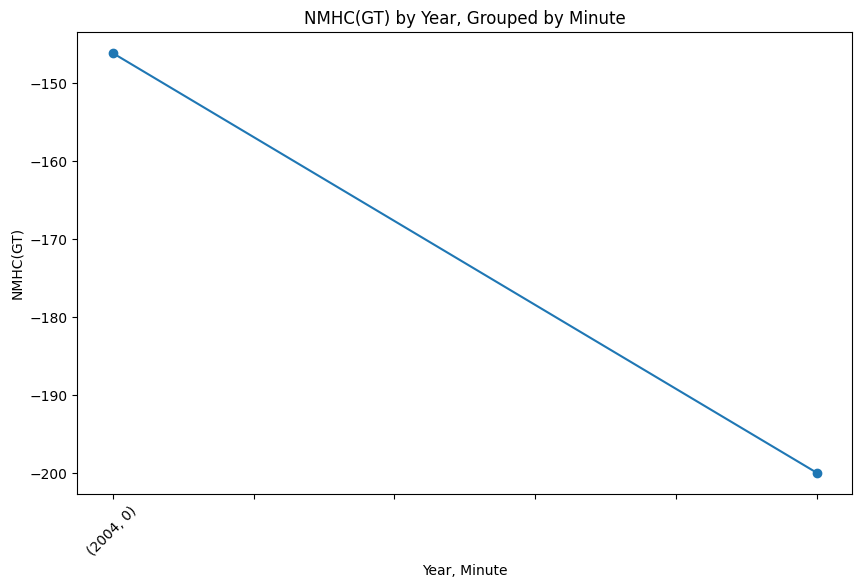

In [ ]:
# Visualization 14: Line plot of NMHC(GT) by year, grouped by minute
plt.figure(figsize=(10, 6))
data.groupby([data['Year'], data['Minute']])['NMHC(GT)'].mean().plot(marker='o')
plt.xlabel('Year, Minute')
plt.ylabel('NMHC(GT)')
plt.title('NMHC(GT) by Year, Grouped by Minute')
plt.xticks(rotation=45)
plt.show()

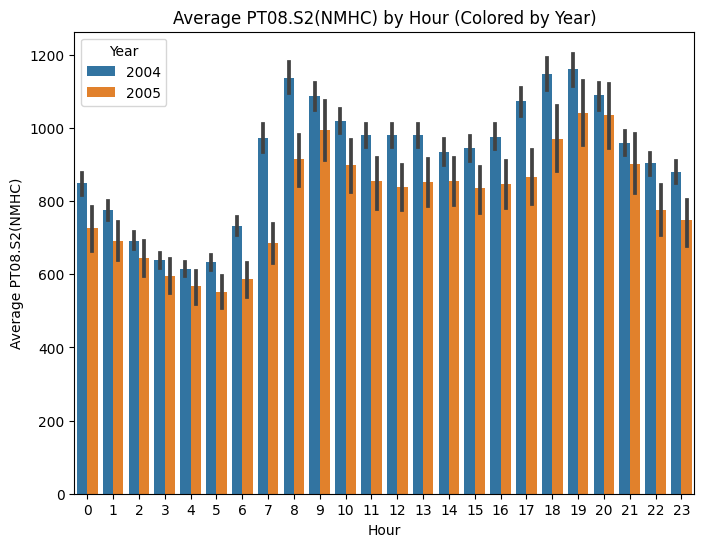

In [ ]:
# Visualization 15: Bar plot of average PT08.S2(NMHC) by hour, colored by year
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x=data['Hour'], y=data['PT08.S2(NMHC)'], hue=data['Year'])
plt.xlabel('Hour')
plt.ylabel('Average PT08.S2(NMHC)')
plt.title('Average PT08.S2(NMHC) by Hour (Colored by Year)')
plt.show()

#4. Data type conversion

In [ ]:
# Reset the index after removing rows
data = data.reset_index(drop=True)

# Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Display the updated DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   int64  
 1   Time           0 non-null      float64
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Month          9357 non-null   int64  
 16  Day            9357 non-null   int64  
 17  Year           9357 non-null   int64  
 18  Hour    

#5.Performing Regression models

#Detection of CO(GT) level:
Carbon Monoxide (CO):

CO is a colorless, odorless gas produced from incomplete combustion of fossil fuels (e.g., vehicle emissions, industrial processes, residential heating).
Health Impact: When inhaled, CO interferes with the oxygen-carrying capacity of red blood cells, reducing the delivery of oxygen to body tissues. Short-term exposure to high levels of CO can lead to headaches, dizziness, nausea, and confusion. Prolonged exposure or exposure to very high levels can be life-threatening, causing unconsciousness, heart problems, and even death.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Set CO(GT) as the target variable
target = 'CO(GT)'

# Drop columns that won't be used as features (you can modify this based on your analysis)
# For simplicity, we are using some of the air quality-related features.
features = ['Month', 'Day', 'Year', 'Hour', 'Minute', 'Second', 'T', 'RH', 'AH']

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_data, train_target)
rf_predictions = rf_model.predict(test_data)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(train_data, train_target)
dt_predictions = dt_model.predict(test_data)

# Create SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(train_data, train_target)
svr_pred = svr.predict(test_data)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# Create Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(train_data, train_target)
gb_pred = gb_model.predict(test_data)

In [ ]:
# Evaluation Metrics
def evaluate_model(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)
    return mse, r2, rmse, mae

rf_mse, rf_r2, rf_rmse, rf_mae = evaluate_model(rf_predictions, test_target)
dt_mse, dt_r2, dt_rmse, dt_mae = evaluate_model(dt_predictions, test_target)
svr_mse, svr_r2, svr_rmse, svr_mae = evaluate_model(svr_pred, test_target)
gb_mse, gb_r2, gb_rmse, gb_mae = evaluate_model(gb_pred, test_target)



print("Random Forest Regression Metrics:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)

print("\nDecision Tree Regression Metrics:")
print("MSE:", dt_mse)
print("R2 Score:", dt_r2)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)
print("\nSupport Vector Regression Metrics:")
print("MSE:", svr_mse)
print("R2 Score:", svr_r2)
print("RMSE:", svr_rmse)
print("MAE:", svr_mae)


print("\nGradient Boosting Regression Metrics:")
print("MSE:", gb_mse)
print("R2 Score:", gb_r2)
print("RMSE:", gb_rmse)
print("MAE:", gb_mae)

Random Forest Regression Metrics:
MSE: 1044.7495086068377
R2 Score: 0.8231672069239726
RMSE: 32.322585116398685
MAE: 13.753574786324787

Decision Tree Regression Metrics:
MSE: 1957.1140224358976
R2 Score: 0.6687417068833129
RMSE: 44.239281441224804
MAE: 10.23263888888889

Support Vector Regression Metrics:
MSE: 7113.161251416404
R2 Score: -0.20396340110793565
RMSE: 84.33955923181247
MAE: 36.20988384179365

Gradient Boosting Regression Metrics:
MSE: 3462.345121636511
R2 Score: 0.4139684647771895
RMSE: 58.84169543475537
MAE: 41.41166884967325


#Detection og NO2(GT) level:
Nitrogen Oxides (NOx):

NOx refers to nitrogen oxide gases, mainly nitrogen monoxide (NO) and nitrogen dioxide (NO2), produced from combustion processes (e.g., vehicles, power plants, industrial facilities).
Health Impact: NOx can irritate the respiratory system and exacerbate existing respiratory conditions such as asthma and chronic bronchitis. NO2, in particular, is a highly reactive gas that can lead to airway inflammation and increased susceptibility to respiratory infections. Long-term exposure to NO2 has been associated with reduced lung function growth in children and increased respiratory symptoms in adults.

In [ ]:
# Set CO(GT) as the target variable
target = 'NO2(GT)'

# Drop columns that won't be used as features (you can modify this based on your analysis)
# For simplicity, we are using some of the air quality-related features.
features = ['Month', 'Day', 'Year', 'Hour', 'Minute', 'Second', 'T', 'RH', 'AH']

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_data, train_target)
rf_predictions = rf_model.predict(test_data)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(train_data, train_target)
dt_predictions = dt_model.predict(test_data)

# Create SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(train_data, train_target)
svr_pred = svr.predict(test_data)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create logistic regression
log_reg = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=1000, solver='saga'))

log_reg.fit(train_data, train_target)
log_reg_pred = log_reg.predict(test_data)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(train_data, train_target)
gb_pred = gb_model.predict(test_data)

In [ ]:
# Evaluation Metrics
def evaluate_model(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)
    return mse, r2, rmse, mae

rf_mse, rf_r2, rf_rmse, rf_mae = evaluate_model(rf_predictions, test_target)
dt_mse, dt_r2, dt_rmse, dt_mae = evaluate_model(dt_predictions, test_target)
svr_mse, svr_r2, svr_rmse, svr_mae = evaluate_model(svr_pred, test_target)
log_reg_mse, log_reg_r2, log_reg_rmse, log_reg_mae = evaluate_model(log_reg_pred, test_target)
gb_mse, gb_r2, gb_rmse, gb_mae = evaluate_model(gb_pred, test_target)



print("Random Forest Regression Metrics:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)

print("\nDecision Tree Regression Metrics:")
print("MSE:", dt_mse)
print("R2 Score:", dt_r2)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)


print("\nSupport Vector Regression Metrics:")
print("MSE:", svr_mse)
print("R2 Score:", svr_r2)
print("RMSE:", svr_rmse)
print("MAE:", svr_mae)

print("\nLogistic Regression Metrics:")
print("MSE:", log_reg_mse)
print("R2 Score:", log_reg_r2)
print("RMSE:", log_reg_rmse)
print("MAE:", log_reg_mae)

print("\nGradient Boosting Regression Metrics:")
print("MSE:", gb_mse)
print("R2 Score:", gb_r2)
print("RMSE:", gb_rmse)
print("MAE:", gb_mae)

Random Forest Regression Metrics:
MSE: 1970.5210017094018
R2 Score: 0.8721818749931682
RMSE: 44.39055081556661
MAE: 25.215662393162393

Decision Tree Regression Metrics:
MSE: 3868.5699786324785
R2 Score: 0.7490646581804642
RMSE: 62.197829372354136
MAE: 28.28472222222222

Support Vector Regression Metrics:
MSE: 16602.927420225475
R2 Score: -0.0769512482418575
RMSE: 128.85234736016832
MAE: 81.48429792547849

Logistic Regression Metrics:
MSE: 71593.22382478633
R2 Score: -3.6439046447819283
RMSE: 267.56910102772764
MAE: 230.5977564102564

Gradient Boosting Regression Metrics:
MSE: 6490.702085531034
R2 Score: 0.5789796861688777
RMSE: 80.56489362948997
MAE: 57.76097614860586
